
* Student name: Wambui Munene
* Student pace: DSPT08
* Scheduled project review date/time: 15/11/2024
* Instructor name: Samuel Karu



### Introduction

In this analysis, we will be analysing fuel consumption data and carbon dioxide emmisions data for new light-duty vehicles available for sale in Canada.We aim to understand, using data, the relationship between vehicle makes and models, engine size, number of cylinders, transmissiom type and the type of fuel on fuel economy and the resulting carbon footprint. We will use a dataset from https://www.kaggle.com/  based on original data from https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

### Problem Statement

Our Data Science Consulting Firm has been hired by Canadian start-up firm, that is venturing into the budget car rental business. Their mission is to provide a low-priced car rental model to cater for a demographic that is price and environmental conscious. They have tasked us to analyze different car makes, models and vehicle class to determine the most fuel effective models with the least carbon emmisions. Because car models are ever changing, they would want to understand the factors that drive those 2 variables and would like us to develop for them a predictive model that they can use to evaluate future car models that enter the market.

### Objectives

Our analysis will consist of 5 main tasks:-

1. **Industry Background:** This will include background understanding of the car industry and especially the relationships between , fuel consumption and carbon dioxide emissions the type of fuel used, engine sizes, and transmission types. To do this we will perform background internet reserach from sites such as https://www.greenvehicleguide.gov.au/pages/UnderstandingEmissions/VehicleEmissions and https://climate.ec.europa.eu/news-your-voice/news/publication-real-world-co2-emissions-and-fuel-consumption-cars-and-vans-. https://iopscience.iop.org/article/10.1088/1755-1315/214/1/012136/pdf <p>  


2. **Understand the dataset:**  Understand the acronyms/technical terms used in the data set, review the shape and type of the data, understand the numerical and categorical columns, review the missing values and make a decision on how to deal with the Null values (drop or replace), look for duplicates and drop them, drop any unnecessary columns that are not useful for the analysis, add new colums if necessary for better analysis and prepare the data for EDA.<p>

3. **Business Objective:** Identify and recommend to our client from each vehicle class, (3-5) makes that give the best fuel efficiency and have the lowest CO2 emissions. <p> 
    a. Investigate how different car makes perform in terms of fuel efficiency and CO2 emmissions  
    b. Investigate how Engine Size affects fuel efficiency and CO2 emissions  
    c. Investigate how Transmission Type affects fuel efficiency  
    d. Investigate how Fuel Type affects CO2 emissions <p> 
       
    
4.  **Statistical Tests** <p> 
    4.1. **Trend Analysis**  
       a. Trend analysis to identify average fuel consumption for the top 3 makes in each vehicle class over time  
       b. Trend analysis to identify average emissions for the top 3 makes in each vehicle class over time<p>
    
     
    4.2. **Regression Analysis**  
       a. Effect of engine size on fuel efficiency  
       b. Effect of fuel consumption as measured by 'Comb (L/100 KM) and emissions  
       c. Effect of Transmission type on fuel efficiency  
       d. Effect of fuel type on emissions  <p>
    
          
    4.3. **Hypothesis Testing**   
       a. Test whether the relationships obtaing by our regression models above are statistically significant<p>  
       
       
5. **Summarize our findings and give conclusions**  
    5.1. Give recomendations to our client on the right mix of car makes to consider for their  business that give them the              best fuel economy and low CO2 emissions.  
    5.2. Provide them with a summary of the various factors that have statistically significant impact on fuel efficienct and            CO2 emissions.


### 1.0 Industry Background

 From the Data Card in the Kaggle dataset, we have obtained the following explanations about the abbreviations used:

**Model**

4WD/4X4 = Four-wheel drive;
AWD = All-wheel drive;
CNG = Compressed natural gas;
FFV = Flexible-fuel vehicle;
NGV = Natural gas vehicle

**Transmission**

A = Automatic; 
AM = Automated manual; 
AS = Automatic with select shift; 
AV = Continuously variable; 
M = Manual; 
3 - 10 = Number of gears

**Fuel Type**

X = Regular gasoline:
Z = Premium gasoline:
D = Diesel:
E = Ethanol (E85);
N = Natural Gas

**Fuel Consumption**:
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

The car industry standards for fuel efficiency are often measured in liters per 100 kilometers (L/100 km) combined rating. Here's a general classification of fuel efficiency categories:

**Low Fuel Efficiency**: Vehicles that consume more than 12 L/100 km.

**Medium Fuel Efficiency**: Vehicles that consume between 8 L/100 km and 12 L/100 km.

**High Fuel Efficiency** : Vehicles that consume less than 8 L/100 km.

**CO2 Emissions**:
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

**Low Emissions**: Typically, vehicles with emissions below 150 g CO₂/km are considered low-emission.

**Medium Emissions**: Vehicles with emissions above 150 g CO₂/km and below 250 g CO₂/km fall into the medium-emission category.

**High Emissions**: Vehicles with emissions above 250 g CO₂/km are considered high-emission.

These standards are designed to reduce greenhouse gas emissions and improve air quality, contributing to global efforts to combat climate change. Here are some targets for fuel emissions and fuel efficiency for the USA, Canada and the EU by 2030:

**USA**

**Emissions Reduction**: The USA aims to reduce greenhouse gas emissions by 50-52% below 2005 levels by 2030.
**Fuel Efficiency**: The USA has set ambitious fuel efficiency standards for vehicles, aiming to increase the average fuel economy to about 50 miles per gallon by 2025, with further improvements expected by 2030.

**Canada**

**Emissions Reduction**: Canada has committed to reducing greenhouse gas emissions by 40-45% below 2005 levels by 2030.
**Fuel Efficiency**: Canada is focusing on improving fuel efficiency through measures like carbon pricing, clean fuels, and promoting electric vehicles.

**EU**

**Emissions Reduction**: The EU aims to reduce greenhouse gas emissions by 55% below 1990 levels by 2030.
**Fuel Efficiency**: The EU has set an ambitious energy efficiency target of reducing final energy consumption by 11.7% compared to projections for 2030

### 2. 1  Understanding the Dataset

In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Load the data as a dataframe and dsplay the first 5 rows

data = pd.read_csv('../Data/Fuel_Consumption_2000_2022.csv')
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# check the shape of the data
data.shape
print(f"This data set consists of {data.shape[0]} rows")
print(f"This data set consists of {data.shape[1]} columns")

This data set consists of 22556 rows
This data set consists of 13 columns


In [4]:
data.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [5]:
# Get column attributes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


From the column attributes the data does not have any null values. Also the columns that we expect to be numerical are well formatted as int or float. Categorical columns are likewise well formatted as objects. The date column needs to be converted to date format.

In [6]:
# confirming there are no Null values

data.isnull().values.any()

False

In [7]:
# Get statistical summary of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


From these summary statistics, we can detect detect extreme values in the 100th percentile, for all variables. The values are all more than twice as large as the numbers we are seeing in the 75th percentile. This is indicative of a outliers in the data set. This is not peculiar in the car industry as we have vehicles that are manufuctured for high performance e.g. for sporting activities or luxury (niche market)  and their features are significantly different from what are found in cars that are for day to day regular use.

In [8]:
# Get statistical summary of the categorical columns
data.describe(include='O').T


,count,unique,top,freq
MAKE,22556,87,CHEVROLET,1725
MODEL,22556,4242,JETTA,89
VEHICLE CLASS,22556,32,SUV,2640
TRANSMISSION,22556,30,A4,3519
FUEL,22556,5,X,11822


We observe that most popular make is Chevrolet and Jetta is the most prevalent model. The SUV is the most popular class of vehicle and most transmissions are 4 gear automatic. Regular gasoline cars are the most common.

## 2.2 Data Cleaning and Feature Engineering

Now that we have understood the basic data structure and the data types, we can go ahead and clean the data set before we can perform Explorative Data Analysis. In this section, we will clean up column names and also certain values in the data, drop any irrelevant columns, check for duplicates and outliers and drop duplicates and any extreme values that may distort our statistical analysis.

In [9]:
# Making a copy of the DataFrame before we clean
data1 = data.copy(deep=True)
data1.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [10]:
# check for duplicates
data1[data1.duplicated()]

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
378,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,17.7,12.7,15.4,18,354


In [11]:
# drop the duplicate row
data1.drop_duplicates(inplace=True)

In [12]:
# confirm the row is dropped
#data.shape
print(f"This data set consists of {data1.shape[0]} rows")
print(f"This data set consists of {data1.shape[1]} columns")

This data set consists of 22555 rows
This data set consists of 13 columns


We now have one less row on the dataset

In [13]:
# Change column names to sentence case for better readability

data1.columns = data.columns.str.title()
data1.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [14]:
# View unique values in 'Make', 'Vehicle Class' and Transmission to check for duplicated entries due to spellings 
# or case sensitivity

columns_to_check = ['Make','Vehicle Class','Transmission']

# check for unique values in the specified column
unique_values = data1[columns_to_check].apply(lambda x: x.unique())

#Display the unique values for each specified column
for column in unique_values.index:
    print(f"Unique values in '{column}':{unique_values[column]}")

Unique values in 'Make':['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS' 'Acura' 'Alfa Romeo' 'Aston Martin' 'Audi'
 'Bentley' 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Genesis' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce'
 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']
Unique values in 'Vehicle Class':['COMPACT' 'MID-SIZE' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'TWO-

We have duplicated names in the Make and Vehicle columns. Upper Case names are duplicates of the sentence case names. The transmission column consists of 2 elements: Transmission type and the number of gears. For enhanced analysis, we will split these into two new columns.

In [15]:
# Convert the 'Make ' column to Sentence case

data1['Make'] = data1['Make'].str.title()

# Check unique values again
data1['Make'].unique()

array(['Acura', 'Audi', 'Bmw', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Daewoo', 'Dodge', 'Ferrari', 'Ford', 'Gmc', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Land Rover', 'Lexus', 'Lincoln', 'Mazda', 'Mercedes-Benz',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
       'Bentley', 'Rolls-Royce', 'Maserati', 'Mini', 'Mitsubishi',
       'Smart', 'Hummer', 'Aston Martin', 'Lamborghini', 'Bugatti',
       'Scion', 'Fiat', 'Ram', 'Srt', 'Alfa Romeo', 'Genesis'],
      dtype=object)

In [16]:
# Define the mapping to replace the Upper Case duplicates for the Vehicle Class column. 
# We will use mapping because the duplicate value have both case sensitivity and "-" and ":" separation issues

replace_dict = { 'COMPACT': 'Compact', 'MID-SIZE': 'Mid-size', 'SUBCOMPACT': 'Subcompact', 
                'STATION WAGON - MID-SIZE': 'Station wagon: Mid-size','MINICOMPACT': 'Minicompact',
                'TWO-SEATER': 'Two-seater','STATION WAGON - SMALL': 'Station wagon: Small',
                'FULL-SIZE': 'Full-size', 'SUV': 'SUV: Standard','VAN - CARGO':'Van:Cargo',
                'VAN - PASSENGER':'Van: Passenger','PICKUP TRUCK - STANDARD':'Pickup truck: Standard',
                'PICKUP TRUCK - SMALL':'Pickup truck: Small','MINIVAN': 'Minivan','SUV - STANDARD': 'Suv: Standard',
                'SPECIAL PURPOSE VEHICLE': 'Special purpose vehicle','SUV - SMALL': 'SUV: Small'}

# Replace the upper case duplicates 
data1['Vehicle Class'] = data1['Vehicle Class'].replace(replace_dict)
data1['Vehicle Class'].unique()
               

array(['Compact', 'Mid-size', 'Subcompact', 'Station wagon: Mid-size',
       'Minicompact', 'Two-seater', 'Station wagon: Small', 'Full-size',
       'SUV: Standard', 'Van:Cargo', 'Van: Passenger',
       'Pickup truck: Standard', 'Pickup truck: Small', 'Minivan',
       'Suv: Standard', 'Special purpose vehicle', 'SUV: Small'],
      dtype=object)

In [17]:
# Create 2 new columns for 'Transmission Type' and 'Gears' from the transmission column

data1['Transmission Type'] = data1['Transmission'].str.extract(r'([A-Za-z]+)') 
data1['Gears'] = data1['Transmission'].str.extract(r'(\d+)') 
# Convert Gears column to numeric type 
data1['Gears'] = pd.to_numeric(data1['Gears'], errors='coerce') 
# Display the updated DataFrame 
data1.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0


In [18]:
# Classify emissions column into low, medium and high based on industry standards:
# Define a function to classify emissions 

def classify_emissions(x): 
    if x <= 150: 
        return 'Low' 
    elif 100 < x <= 250: 
        return 'Medium' 
    else: 
        return 'High'
# Apply the classification function to the emissions column

data1['Emissions Class'] = data1['Emissions'].apply(classify_emissions)
data1.head(5)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears,Emissions Class
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0,Medium
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0,Medium
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0,Medium
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0,High
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0,Medium


In [19]:
# Classify Fuel Consumption into low, medium and high efficiency based on general industry standards. We will use the 
# 'Comb (L/100 Km)' column which is the average experince of a regular car rental customer

# Define a function to classify fuel efficiency 
def fuel_efficiency(y): 
    if y > 12: 
        return 'Low Efficiency' 
    elif 8 <= y <= 12: 
        return 'Medium Efficiency' 
    else: 
        return 'High Efficiency'
# Apply the classification function to the emissions column

data1['Fuel Efficiency'] = data1['Comb (L/100 Km)'].apply(fuel_efficiency)
data1.head(5)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0,Medium,Medium Efficiency


In [20]:
# Numerical columns statistics
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,22555.0,2011.554955,6.297939,2000.0,2006.0,2012.0,2017.0,2022.0
Engine Size,22555.0,3.356617,1.335448,0.8,2.3,3.0,4.2,8.4
Cylinders,22555.0,5.854046,1.819582,2.0,4.0,6.0,8.0,16.0
Fuel Consumption,22555.0,12.763294,3.500922,3.5,10.4,12.3,14.7,30.6
Hwy (L/100 Km),22555.0,8.918958,2.274675,3.2,7.3,8.4,10.2,20.9
Comb (L/100 Km),22555.0,11.034148,2.910839,3.6,9.1,10.6,12.7,26.1
Comb (Mpg),22555.0,27.374950,7.376881,11.0,22.0,27.0,31.0,78.0
Emissions,22555.0,250.063844,59.352558,83.0,209.0,243.0,288.0,608.0
Gears,21739.0,5.971342,1.469272,1.0,5.0,6.0,7.0,10.0


The max column shows that we have significant outliers in most columns which is expected in the industry due to specific luxury and sports performance niches. These outliers adversely affect fuel efficiency and emissions and we should remove them for better analysis of the data.

In [21]:
# Categorical Columns Analysis
data1.describe(include='O').T


,count,unique,top,freq
Make,22555,52,Chevrolet,2130
Model,22555,4242,JETTA,89
Vehicle Class,22555,17,SUV: Standard,3247
Transmission,22555,30,A4,3518
Fuel,22555,5,X,11822
Transmission Type,22555,5,A,8690
Emissions Class,22555,3,Medium,11742
Fuel Efficiency,22555,3,Medium Efficiency,12999


It is interesting to note that most vehicles are in the medium emissions class range and the medium fuel efficiency range. This is expected because technologies for high fuel efficiency that leads to low emissions are still not fully adopted. However major countries in the world have set targets to continously improve on the 2 variables systematically.

In [22]:
# Drop the 'Comb (Mpg)'(imperial standard used mostly in the US) column ; all other relevant are using the metric system
# Also drop the 'Transmission' column as it has been split into 2 new columns: 'Transmission Type' and 'Gears'
data2 = data1.drop(columns=['Comb (Mpg)','Transmission'])
data2

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,X,9.2,6.7,8.1,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,X,8.5,6.5,7.6,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,Z,12.2,7.4,10.0,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,Z,13.4,9.2,11.5,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,X,10.0,7.0,8.6,198,A,4.0,Medium,Medium Efficiency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Z,10.7,7.7,9.4,219,AS,8.0,Medium,Medium Efficiency
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Z,10.5,8.1,9.4,219,AS,8.0,Medium,Medium Efficiency
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Z,11.0,8.7,9.9,232,AS,8.0,Medium,Medium Efficiency
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Z,11.5,8.4,10.1,236,AS,8.0,Medium,Medium Efficiency


In [23]:
# Remove for outliers in various columns using IQR method

def remove_outliers(df,columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column]<=upper_bound)]
    return df
# columns to check for outliers
check_outliers = ['Engine Size','Cylinders','Fuel Consumption','Hwy (L/100 Km)',
                    'Comb (L/100 Km)','Emissions','Gears']
# Remove outliers
data3 = remove_outliers(data2,check_outliers)

# display the cleaned DataFrame
data3.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,X,9.2,6.7,8.1,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,X,8.5,6.5,7.6,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,Z,12.2,7.4,10.0,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,Z,13.4,9.2,11.5,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,X,10.0,7.0,8.6,198,A,4.0,Medium,Medium Efficiency


In [24]:
# check the shape of the data
data3.shape
print(f"This data set consists of {data3.shape[0]} rows")
print(f"This data set consists of {data3.shape[1]} columns")

This data set consists of 20864 rows
This data set consists of 15 columns


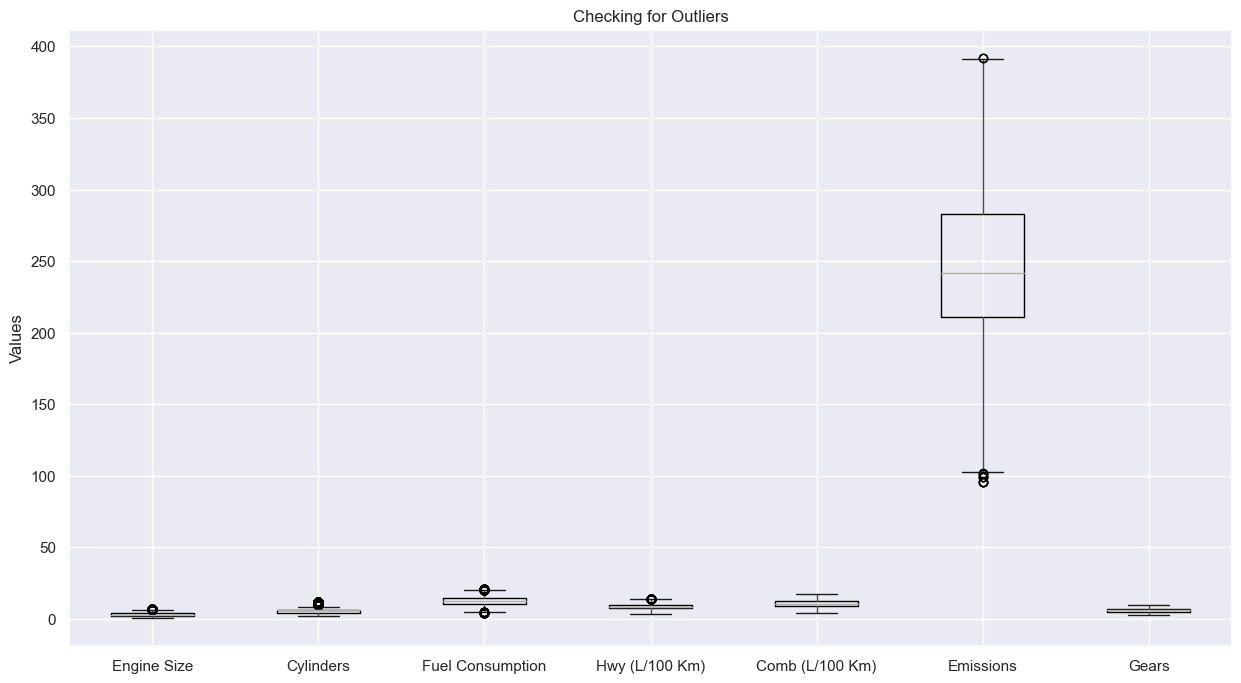

In [25]:
# Generate boxplots for cleaned columns to confirm outliers have been dropped
plt.figure(figsize=(15,8))
data3.boxplot(column=['Engine Size','Cylinders','Fuel Consumption','Hwy (L/100 Km)',
                    'Comb (L/100 Km)','Emissions','Gears'], boxprops=dict(linewidth=1 ))
plt.title('Checking for Outliers')
plt.ylabel('Values')

                          
plt.show();

The outliers are now eliminated and we can go ahead and start EDA. But first we save the clean dataframe to a CSV and make a copy of the same

In [26]:
# save the clean dataframe in csv format
data3.to_csv('FuelEfficiency_Clean.csv',index=False)

In [27]:
# create a copy of the clean dataframe
data3=data3.copy(deep=True)

## 3. Exploratory Data Analysis (EDA)

We will perform univariate, bivariate and multivariate data analysis using summary statistics and visualizations to determine the most fuel efficient vehicles in each vehicle class that also have the lowest or acceptable levels of carbon footprint. Since we are looking for a fleet that cuts across different vehicle classes to appeal to a wide range of customers, our analysis will determine the following:-

1. The best 3 makes and models for each vehicle class - as a customer centric business we need to give our customers choice.
2. The correlation  between various vehicle attributes such as fuel type, engine size, gears, cylinders, transmission type with fuel efficiency and low emmissions.
3. After we draw our conclusions that model A has better fuel economy than all other models in the vehicle class, we will test this hypothesis for statistical significance.
4. We will also develop a linear regression model to predict the 2 efficiency variables based on certain vehicle attributes. This will enable the rental company to evaluate new car models for fuel efficiency and carbon emmisions before purchase.

In [28]:
# Load the clean dataset and create a new dataframe
df_clean = pd.read_csv('FuelEfficiency_Clean.csv')
df_clean

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,X,9.2,6.7,8.1,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,X,8.5,6.5,7.6,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,Z,12.2,7.4,10.0,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,Z,13.4,9.2,11.5,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,X,10.0,7.0,8.6,198,A,4.0,Medium,Medium Efficiency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20859,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Z,10.7,7.7,9.4,219,AS,8.0,Medium,Medium Efficiency
20860,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Z,10.5,8.1,9.4,219,AS,8.0,Medium,Medium Efficiency
20861,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Z,11.0,8.7,9.9,232,AS,8.0,Medium,Medium Efficiency
20862,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Z,11.5,8.4,10.1,236,AS,8.0,Medium,Medium Efficiency


In [46]:
df_clean.isna().sum().any()

False

In [47]:
df_clean.columns


Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Fuel', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)',
       'Emissions', 'Transmission Type', 'Gears', 'Emissions Class',
       'Fuel Efficiency'],
      dtype='object')

### 3.1 Univariate Analysis

In [64]:
# Get Descriptive statistical summary of the numerical columns
# Define custom aggregation functions
specific_cols = ['Engine Size','Cylinders','Emissions','Gears','Hwy (L/100 Km)','Comb (L/100 Km)']
descriptive_stats = df_clean[specific_cols].agg(['mean','std','median','min','max']).T
Mode = df_clean[specific_cols].mode().iloc[0]

print(descriptive_stats)
print(Mode)


                       mean        std  median   min    max
Engine Size        3.303561   1.265645     3.0   0.8    7.0
Cylinders          5.793472   1.726453     6.0   2.0   12.0
Emissions        248.556173  53.426101   242.0  96.0  392.0
Gears              5.990127   1.464825     6.0   3.0   10.0
Hwy (L/100 Km)     8.756351   1.915990     8.4   3.8   14.2
Comb (L/100 Km)   10.851721   2.421089    10.5   4.1   17.5
Engine Size          2.0
Cylinders            6.0
Emissions          221.0
Gears                6.0
Hwy (L/100 Km)       7.8
Comb (L/100 Km)      9.8
Name: 0, dtype: float64


The data shows a high variance on emissions and a moderate variance on consumption

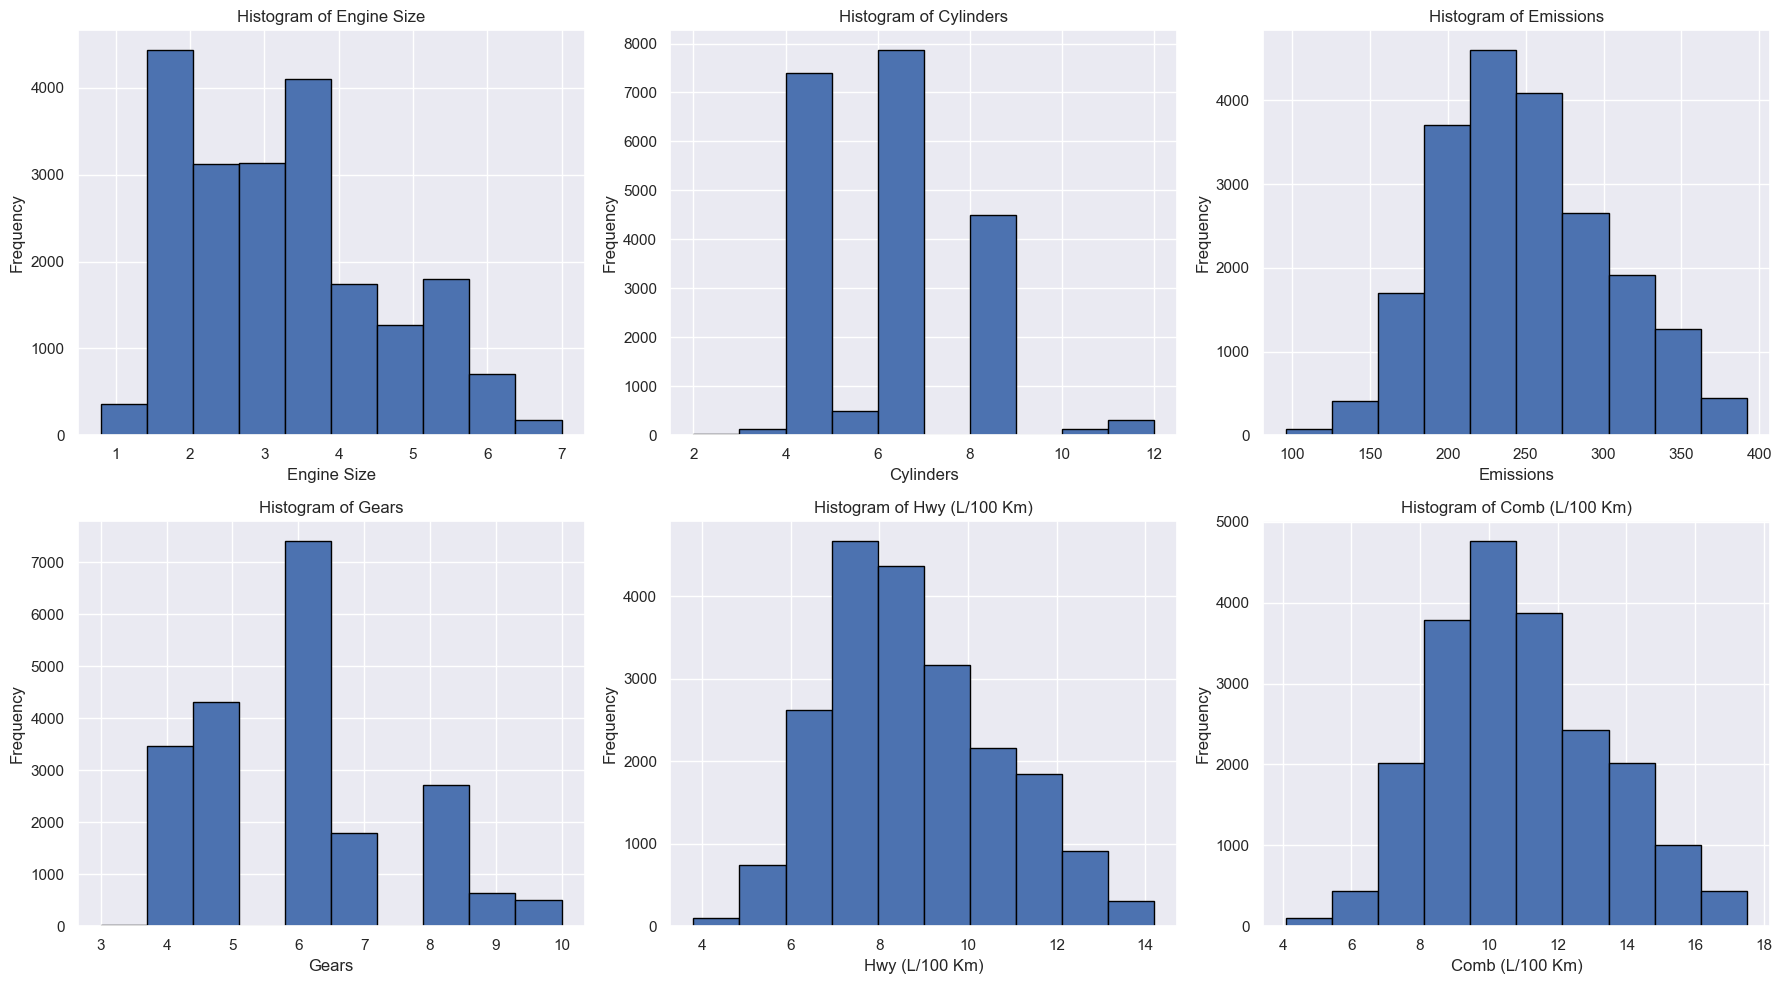

In [65]:
# Create histograms to visualize the numerical columns
list_cols = ['Engine Size','Cylinders','Emissions','Gears','Hwy (L/100 Km)','Comb (L/100 Km)']

# Create sub-plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10)) 
axes = axes.flatten()
# Plot histograms for each numerical column
for i, column in enumerate(list_cols): 
    axes[i].hist(df_clean[column], bins=10, edgecolor='black') 
    axes[i].set_title(f'Histogram of {column}') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [62]:
# Get statistical summary of the categorical columns
df_clean.describe(include='O').T

,count,unique,top,freq
Make,20864,50,Chevrolet,1892
Model,20864,4015,JETTA,89
Vehicle Class,20864,17,Compact,2985
Fuel,20864,5,X,10985
Transmission Type,20864,5,A,8091
Emissions Class,20864,3,Medium,11132
Fuel Efficiency,20864,3,Medium Efficiency,12645


The Vehicle class with the highest frequency after removing outliers is now the Compact and not the SUV Standard. All the other variables remain unchanged.

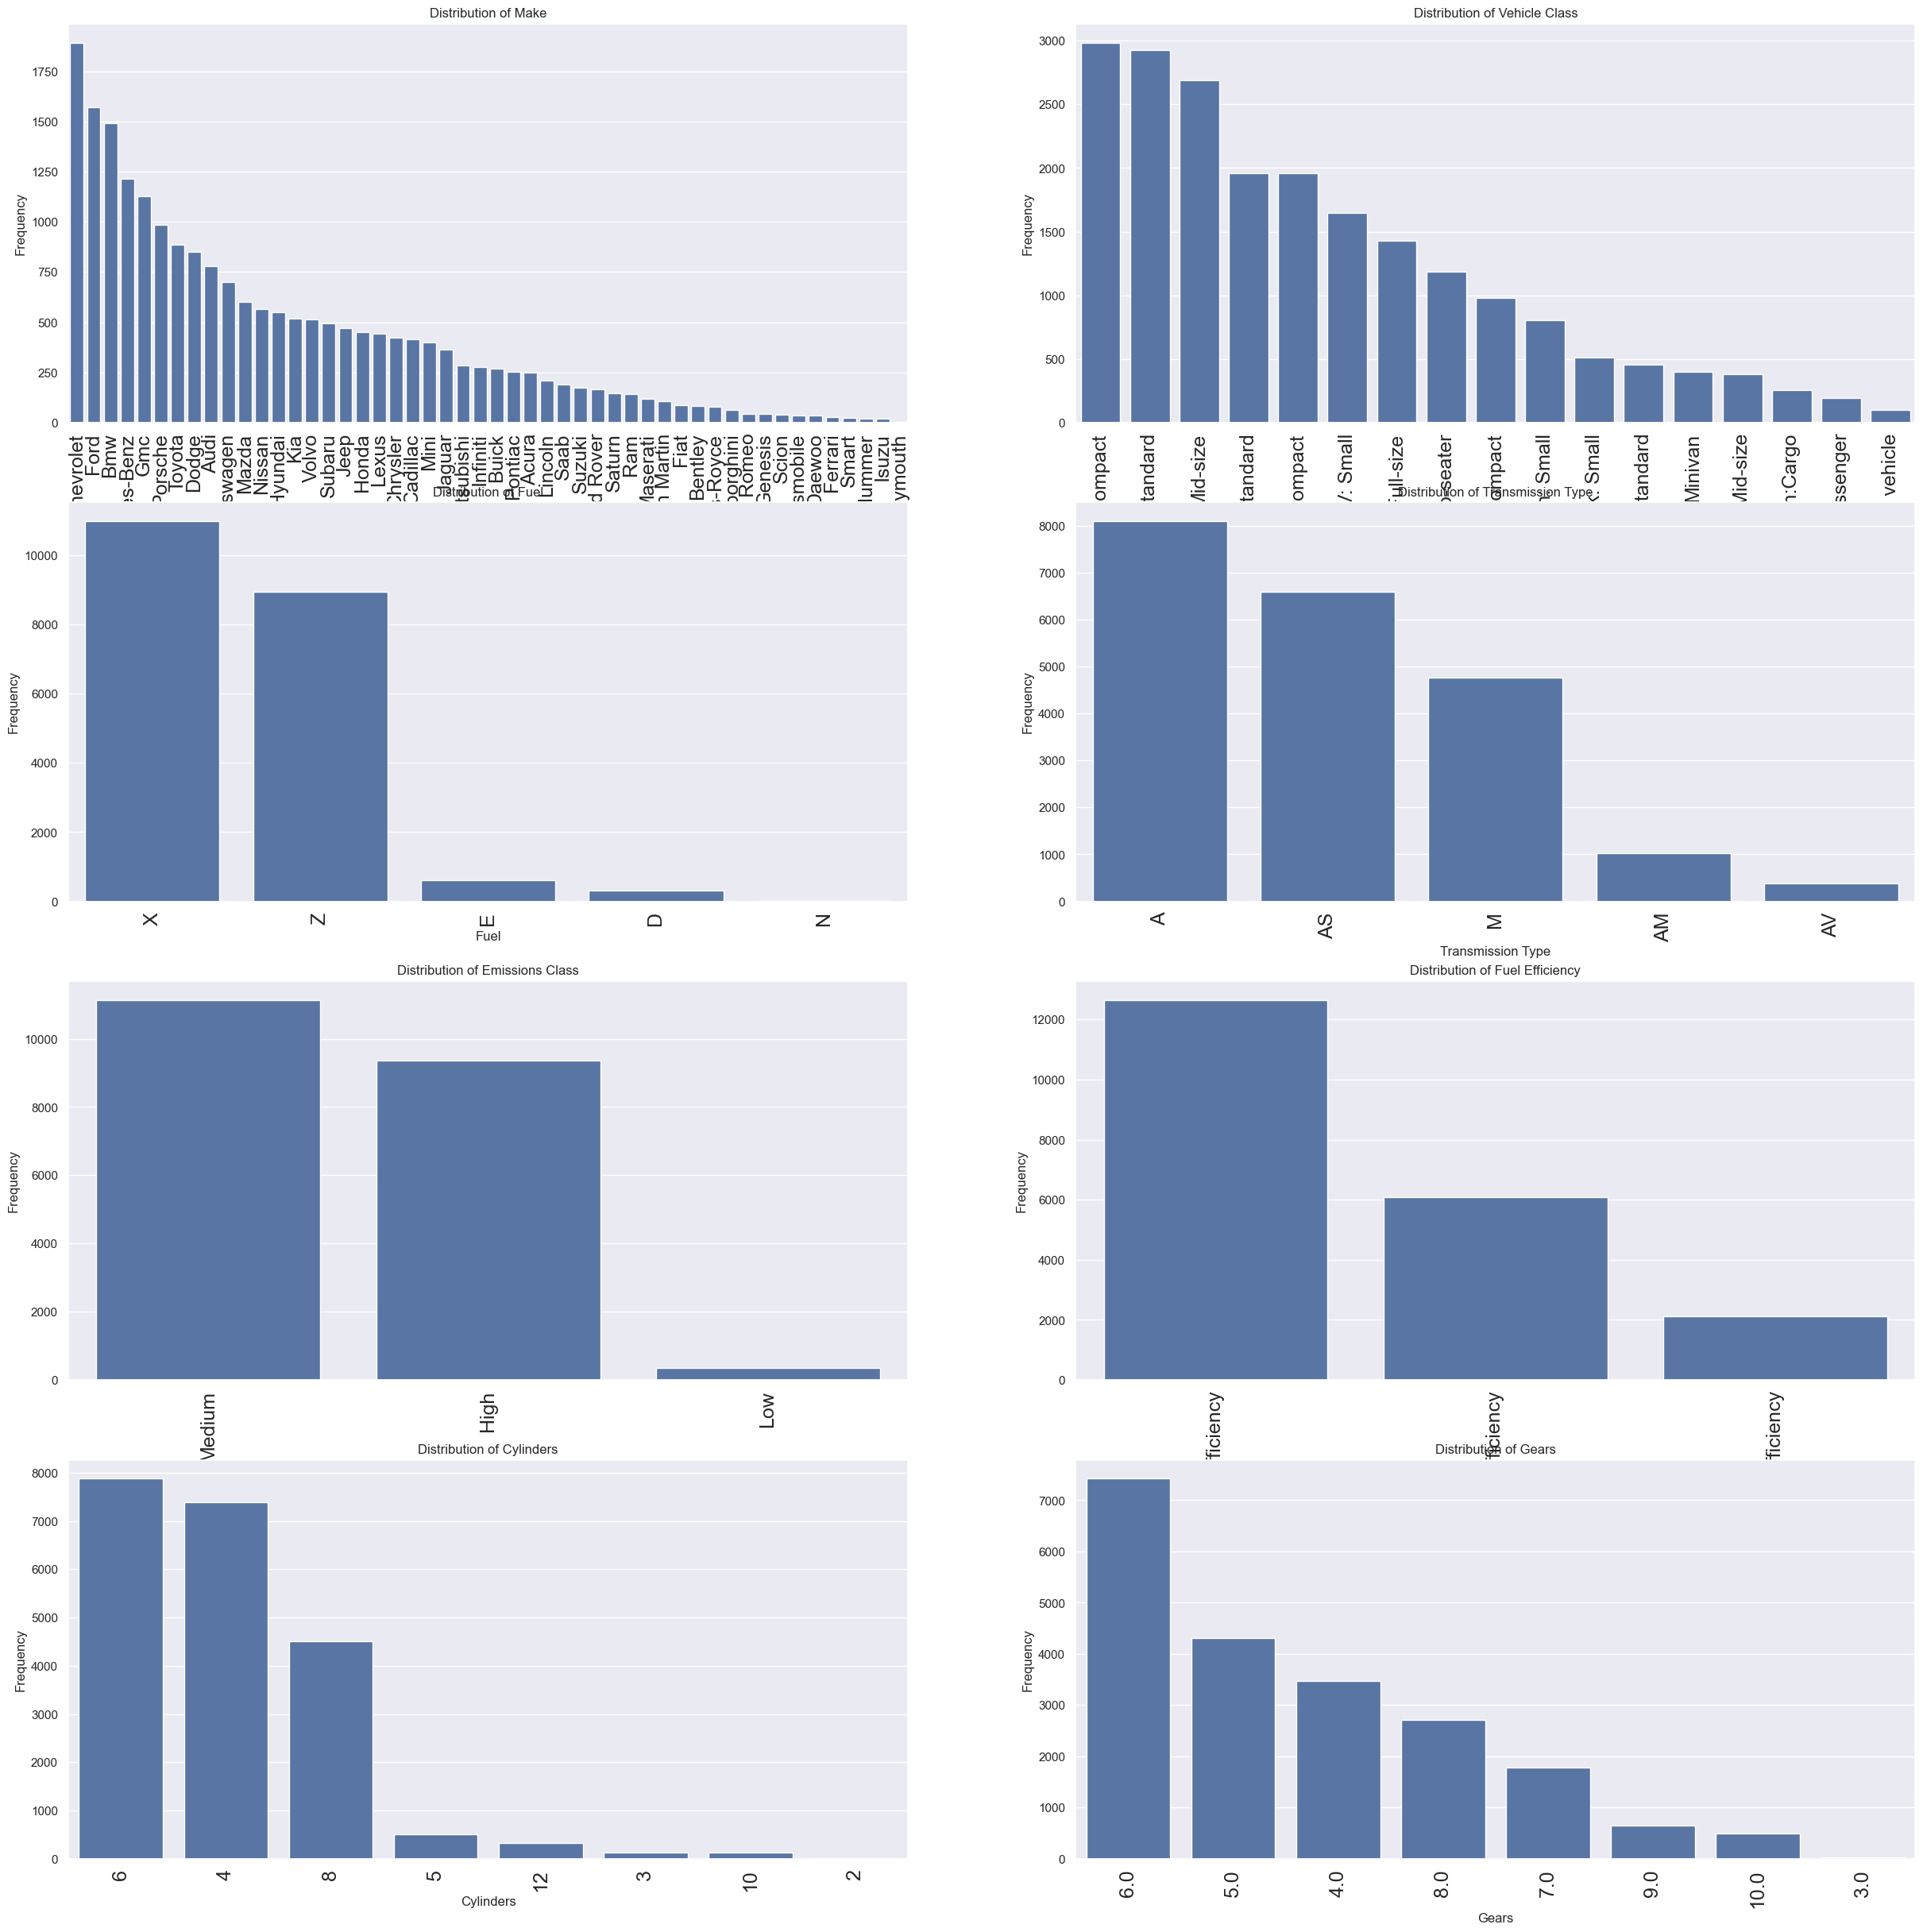

In [63]:
# plot frequency distributions for columns
def plot_frequency_dist(df_clean, columns,rows,cols): 
    fig,axes = plt.subplots(rows,cols,figsize=(30,30))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        sns.countplot(x=column, data=df_clean, order=df_clean[column].value_counts().index, ax=axes[i]) 
        axes[i].set_title(f"Distribution of {column}") 
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=90,labelsize=18)
    plt.tight_layout
    plt.show() 
        
        
# List of columns 
columns_list = ['Make', 'Vehicle Class', 'Fuel', 'Transmission Type', 'Emissions Class','Fuel Efficiency',
                'Cylinders','Gears'] 

rows = 4
cols = 2
# Plot frequency distributions for categorical columns 
plot_frequency_dist(df_clean, columns_list,rows,cols)

### 3.2 Bivariate Analysis
In this section, we will examine the relationships between our two variables of interest (emissions and fuel efficiency) with other variables like make,vehicle class,fuel, gears,transmission type etc. This will help us determine the characteristics that contribute to better fuel efficiency and low emissions and help us narrow down to our fleet composition. We will use bar plots to visualize the relationship between two categorical variables, Box Plots to compare distributions of a numerical variable across different categories, scatter plots to investigate the relationship between two numerical variables (and also help us determinal linearity) for our predictive model, correlation analysis (including heat maps) to quatify the strength and direction of the relationship between two numeric variables.

Because we are looking for the most efficient vehicles we will drop all rows where fuel efficiency is classified as "Low Efficiency" and Emission Class is 'High"

In [84]:
df_clean.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Fuel', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)',
       'Emissions', 'Transmission Type', 'Gears', 'Emissions Class',
       'Fuel Efficiency'],
      dtype='object')

In [93]:
#drop all rows where fuel efficiency is classified as "Low Efficiency" and Emission Class is 'High"

df_filtered = df_clean[~((df_clean['Fuel Efficiency'] == 'Low Efficiency') |(df_clean['Emissions Class'] == 'High'))]
df_filtered

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,X,9.2,6.7,8.1,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,X,8.5,6.5,7.6,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,Z,12.2,7.4,10.0,230,AS,5.0,Medium,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,X,10.0,7.0,8.6,198,A,4.0,Medium,Medium Efficiency
5,2000,Acura,INTEGRA,Subcompact,1.8,4,X,9.3,6.8,8.2,189,M,5.0,Medium,Medium Efficiency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20858,2022,Volvo,XC40 T4 AWD,SUV: Small,2.0,4,X,10.7,7.6,9.3,217,AS,8.0,Medium,Medium Efficiency
20859,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Z,10.7,7.7,9.4,219,AS,8.0,Medium,Medium Efficiency
20860,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Z,10.5,8.1,9.4,219,AS,8.0,Medium,Medium Efficiency
20861,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Z,11.0,8.7,9.9,232,AS,8.0,Medium,Medium Efficiency


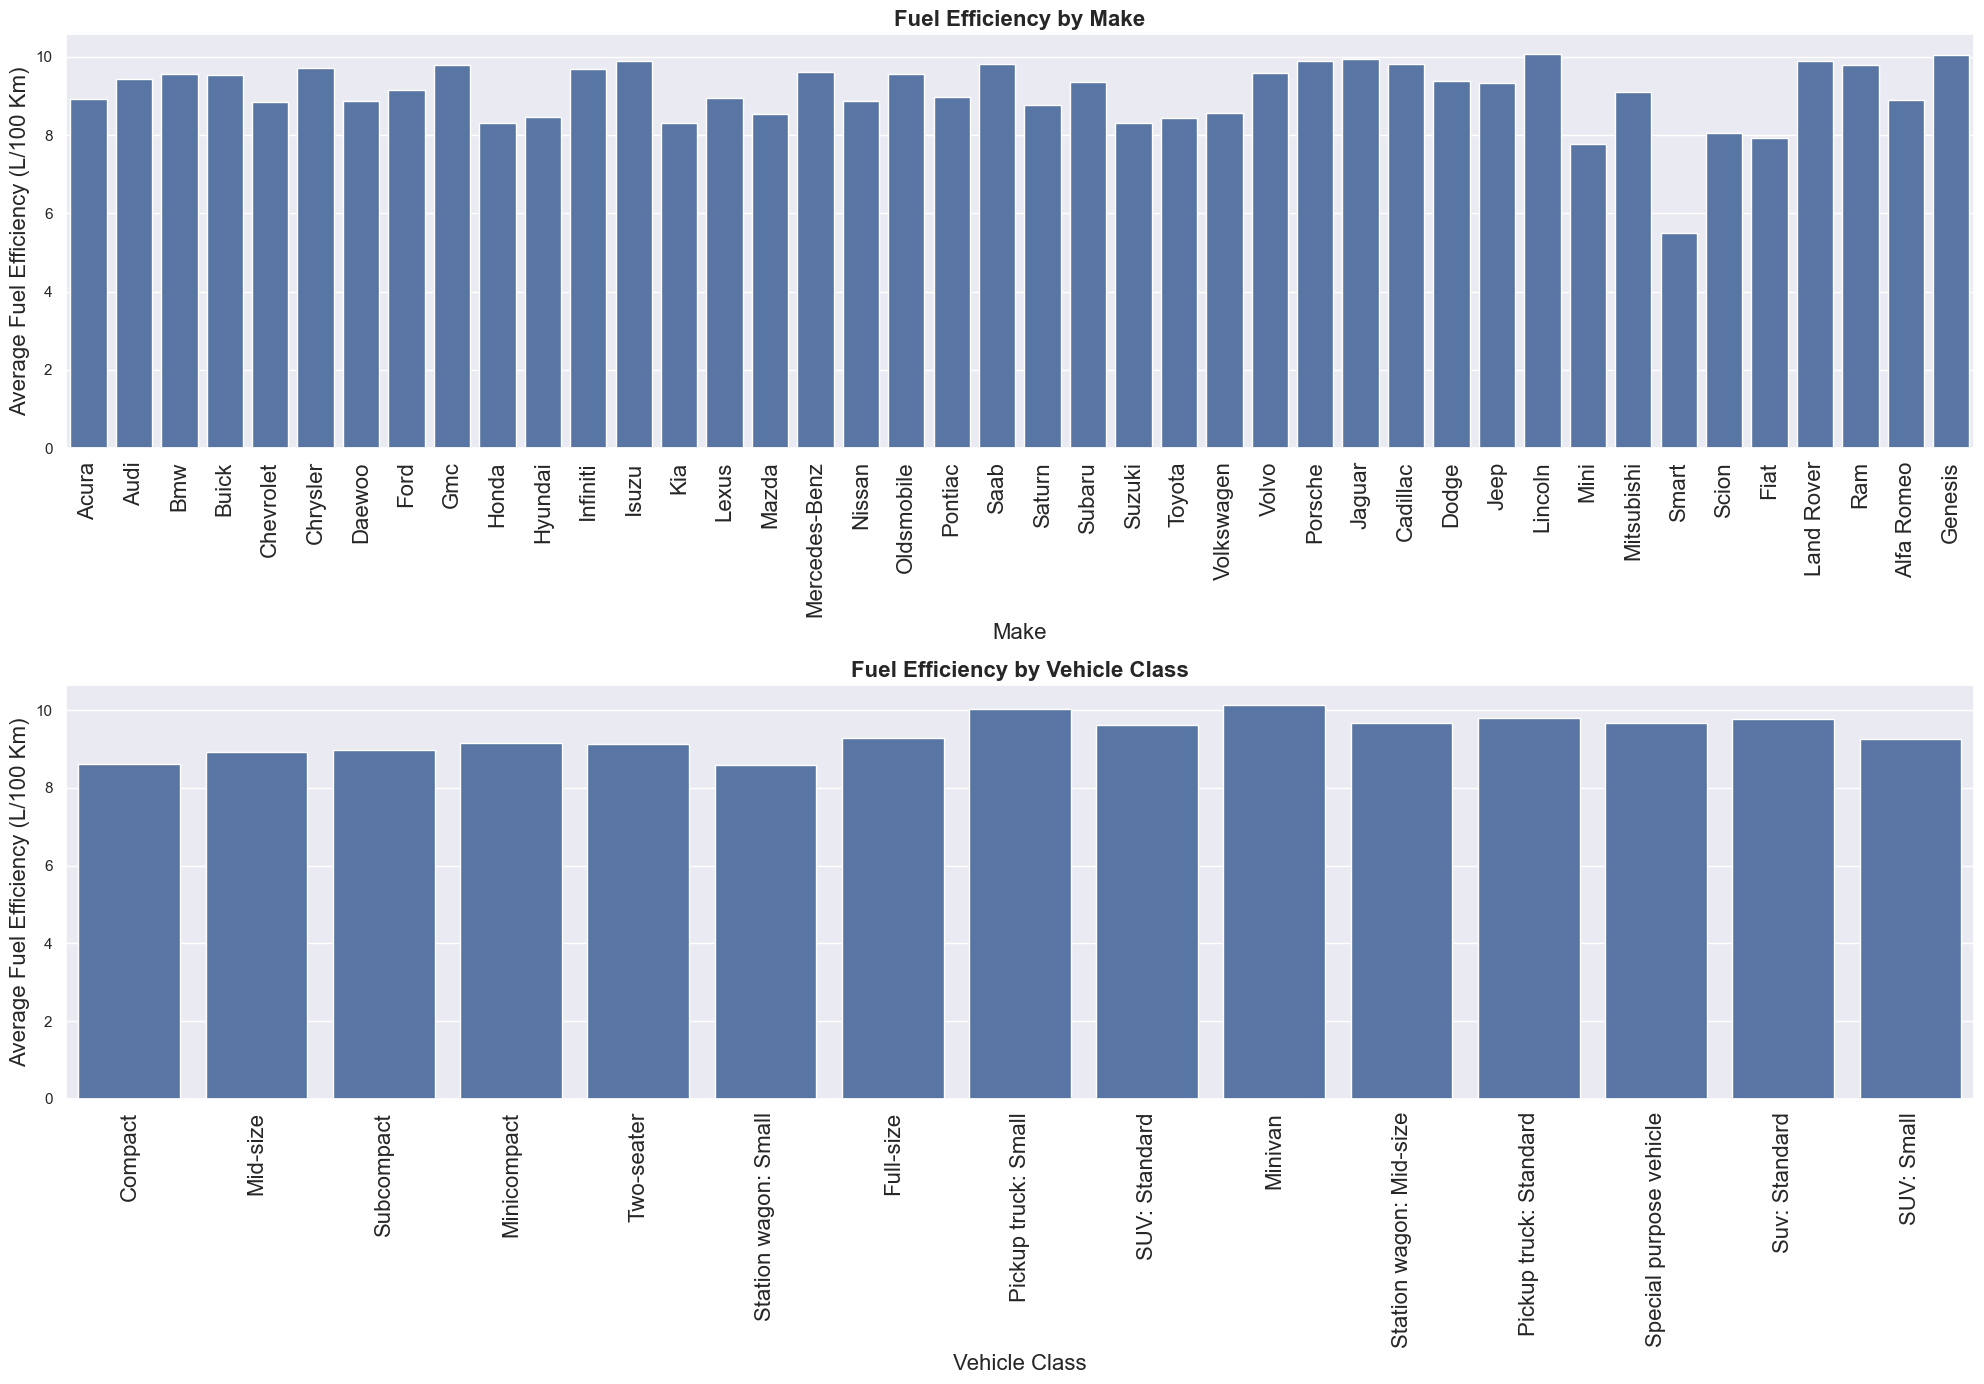

In [95]:
# Visualize Fuel Efficiency on  Make and Vehicle Class 

# Create subplots 
fig, axes = plt.subplots(2, 1, figsize=(20, 14)) 
# Plotting Make vs. Fuel Efficiency 
sns.barplot(x='Make', y='Comb (L/100 Km)', data=df_filtered, estimator=np.mean, errorbar=None, ax=axes[0]) 
axes[0].set_title('Fuel Efficiency by Make',fontsize=16, fontweight ='bold') 
axes[0].set_ylabel('Average Fuel Efficiency (L/100 Km)',fontsize=16) 
axes[0].set_xlabel('Make',fontsize=16)
axes[0].tick_params(axis='x',rotation=90,labelsize=16)

# Plotting Vehicle Class vs. Fuel Efficiency 
sns.barplot(x='Vehicle Class', y='Comb (L/100 Km)', data=df_filtered, estimator=np.mean, errorbar=None, ax=axes[1]) 
axes[1].set_title('Fuel Efficiency by Vehicle Class',fontsize=16, fontweight ='bold') 
axes[1].set_ylabel('Average Fuel Efficiency (L/100 Km)',fontsize=16) 
axes[1].set_xlabel('Vehicle Class',fontsize=16)
axes[1].tick_params(axis='x',rotation=90,labelsize=16)

plt.tight_layout() 
plt.show()